<a href="https://colab.research.google.com/github/kruti002/synapse_lp_tasks/blob/week_3/lp_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 3**

## **DJS Synapse Learning Period**
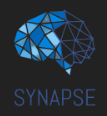

In the task for this week, we will be exploring another machine learning model called the decision tree classifier. We will also learn hyperparameter tuning using ensemble methods(Bagging & Boosting) and Decision Tree Pruning. 

# Decision Tree Classifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [ ]:
titanic =pd.read_csv("/content/drive/MyDrive/synapse_w3/titanic_data.csv")
titanic
#write code here

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [ ]:
def titanic_preprocessing_pipeline(df):
   df.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=True)
   df.drop(["Cabin"], axis=1, inplace=True)
   df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
   df["Age"].fillna(df["Age"].mean(), inplace=True)
   df["Family_members"] = df["SibSp"] + df["Parch"]
   df.drop(["SibSp", "Parch"], axis=1, inplace=True)

   df_ohe = pd.get_dummies(df, columns=["Pclass", "Sex",  "Embarked"])
   return df_ohe
titanic1=titanic_preprocessing_pipeline(titanic)
titanic1
  #enter preprocessing steps as done in task 1
  #make sure the preprocessed dataframe looks like the output in task 1 solution NB
  #return the dataframe
  
 #remove this line after writing the code

,Survived,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,1,0,0,1,0,1,0,0,1
1,1,38.000000,71.2833,1,1,0,0,1,0,1,0,0
2,1,26.000000,7.9250,0,0,0,1,1,0,0,0,1
3,1,35.000000,53.1000,1,1,0,0,1,0,0,0,1
4,0,35.000000,8.0500,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,0,1,0,0,1,0,0,1
887,1,19.000000,30.0000,0,1,0,0,1,0,0,0,1
888,0,29.699118,23.4500,3,0,0,1,1,0,0,0,1
889,1,26.000000,30.0000,0,1,0,0,0,1,1,0,0


In [ ]:

def normalize(data_list):
  X_new = []
  X_max = max(data_list)
  X_min = min(data_list)
  for i in data_list:
    X_new.append( (i - X_min)/(X_max - X_min) )
  return X_new

titanic1["Age"] = normalize(titanic1["Age"])
titanic1["Fare"] = normalize(titanic1["Fare"])
titanic1["Family_members"] = normalize(titanic1["Family_members"]) 
titanic1

,Survived,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,0.014151,0.1,0,0,1,0,1,0,0,1
1,1,0.472229,0.139136,0.1,1,0,0,1,0,1,0,0
2,1,0.321438,0.015469,0.0,0,0,1,1,0,0,0,1
3,1,0.434531,0.103644,0.1,1,0,0,1,0,0,0,1
4,0,0.434531,0.015713,0.0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.025374,0.0,0,1,0,0,1,0,0,1
887,1,0.233476,0.058556,0.0,1,0,0,1,0,0,0,1
888,0,0.367921,0.045771,0.3,0,0,1,1,0,0,0,1
889,1,0.321438,0.058556,0.0,1,0,0,0,1,1,0,0


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [ ]:
y=pd.DataFrame()
y = titanic1['Survived'].copy()
y

#write code here

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<b>remove the y_label (survived) from the dataframe</b>

In [ ]:

X=titanic1.drop(['Survived'],axis=1,)
#write code here


<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=150)

#write code here

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [ ]:
#write code here
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


0    0.589552
1    0.410448
Name: Survived, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt_model=DecisionTreeClassifier(random_state=10)


In [ ]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
dt_model.score(X_train,y_train)

0.9775280898876404

In [ ]:
dt_model.score(X_test,y_test)

0.832089552238806

In [ ]:
dt_model.predict(X_test)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0])

In [ ]:
dt_model.predict_proba(X_test)

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.

In [ ]:
y_pred =dt_model.predict_proba(X_test)[:,1]

In [ ]:
new_y=[]
for i in range(len(y_pred)):
  if y_pred[i]<0.6:
    new_y.append(0)
  else :
    new_y.append(1)

<b>print the test accuracy and train accuracy here</b>

In [ ]:
#write code here
from sklearn.metrics import accuracy_score
accuracy_score(y_test,new_y)

0.832089552238806

In [ ]:
max_depth=dt_model.get_depth()

from sklearn.model_selection import GridSearchCV,ParameterGrid
from sklearn.metrics import make_scorer,classification_report
max_depth_grid_search= GridSearchCV( estimator=DecisionTreeClassifier (random_state=10),
scoring=make_scorer(accuracy_score),
param_grid=ParameterGrid({"max_depth": [[max_depth] for max_depth in range(1, max_depth + 1)]}),)
max_depth_grid_search. fit (X_train, y_train)

max_depth_grid_search.best_params_

best_max_depth_tree = max_depth_grid_search.best_estimator_
best_max_depth = best_max_depth_tree.get_depth()


<function matplotlib.pyplot.show(*args, **kw)>

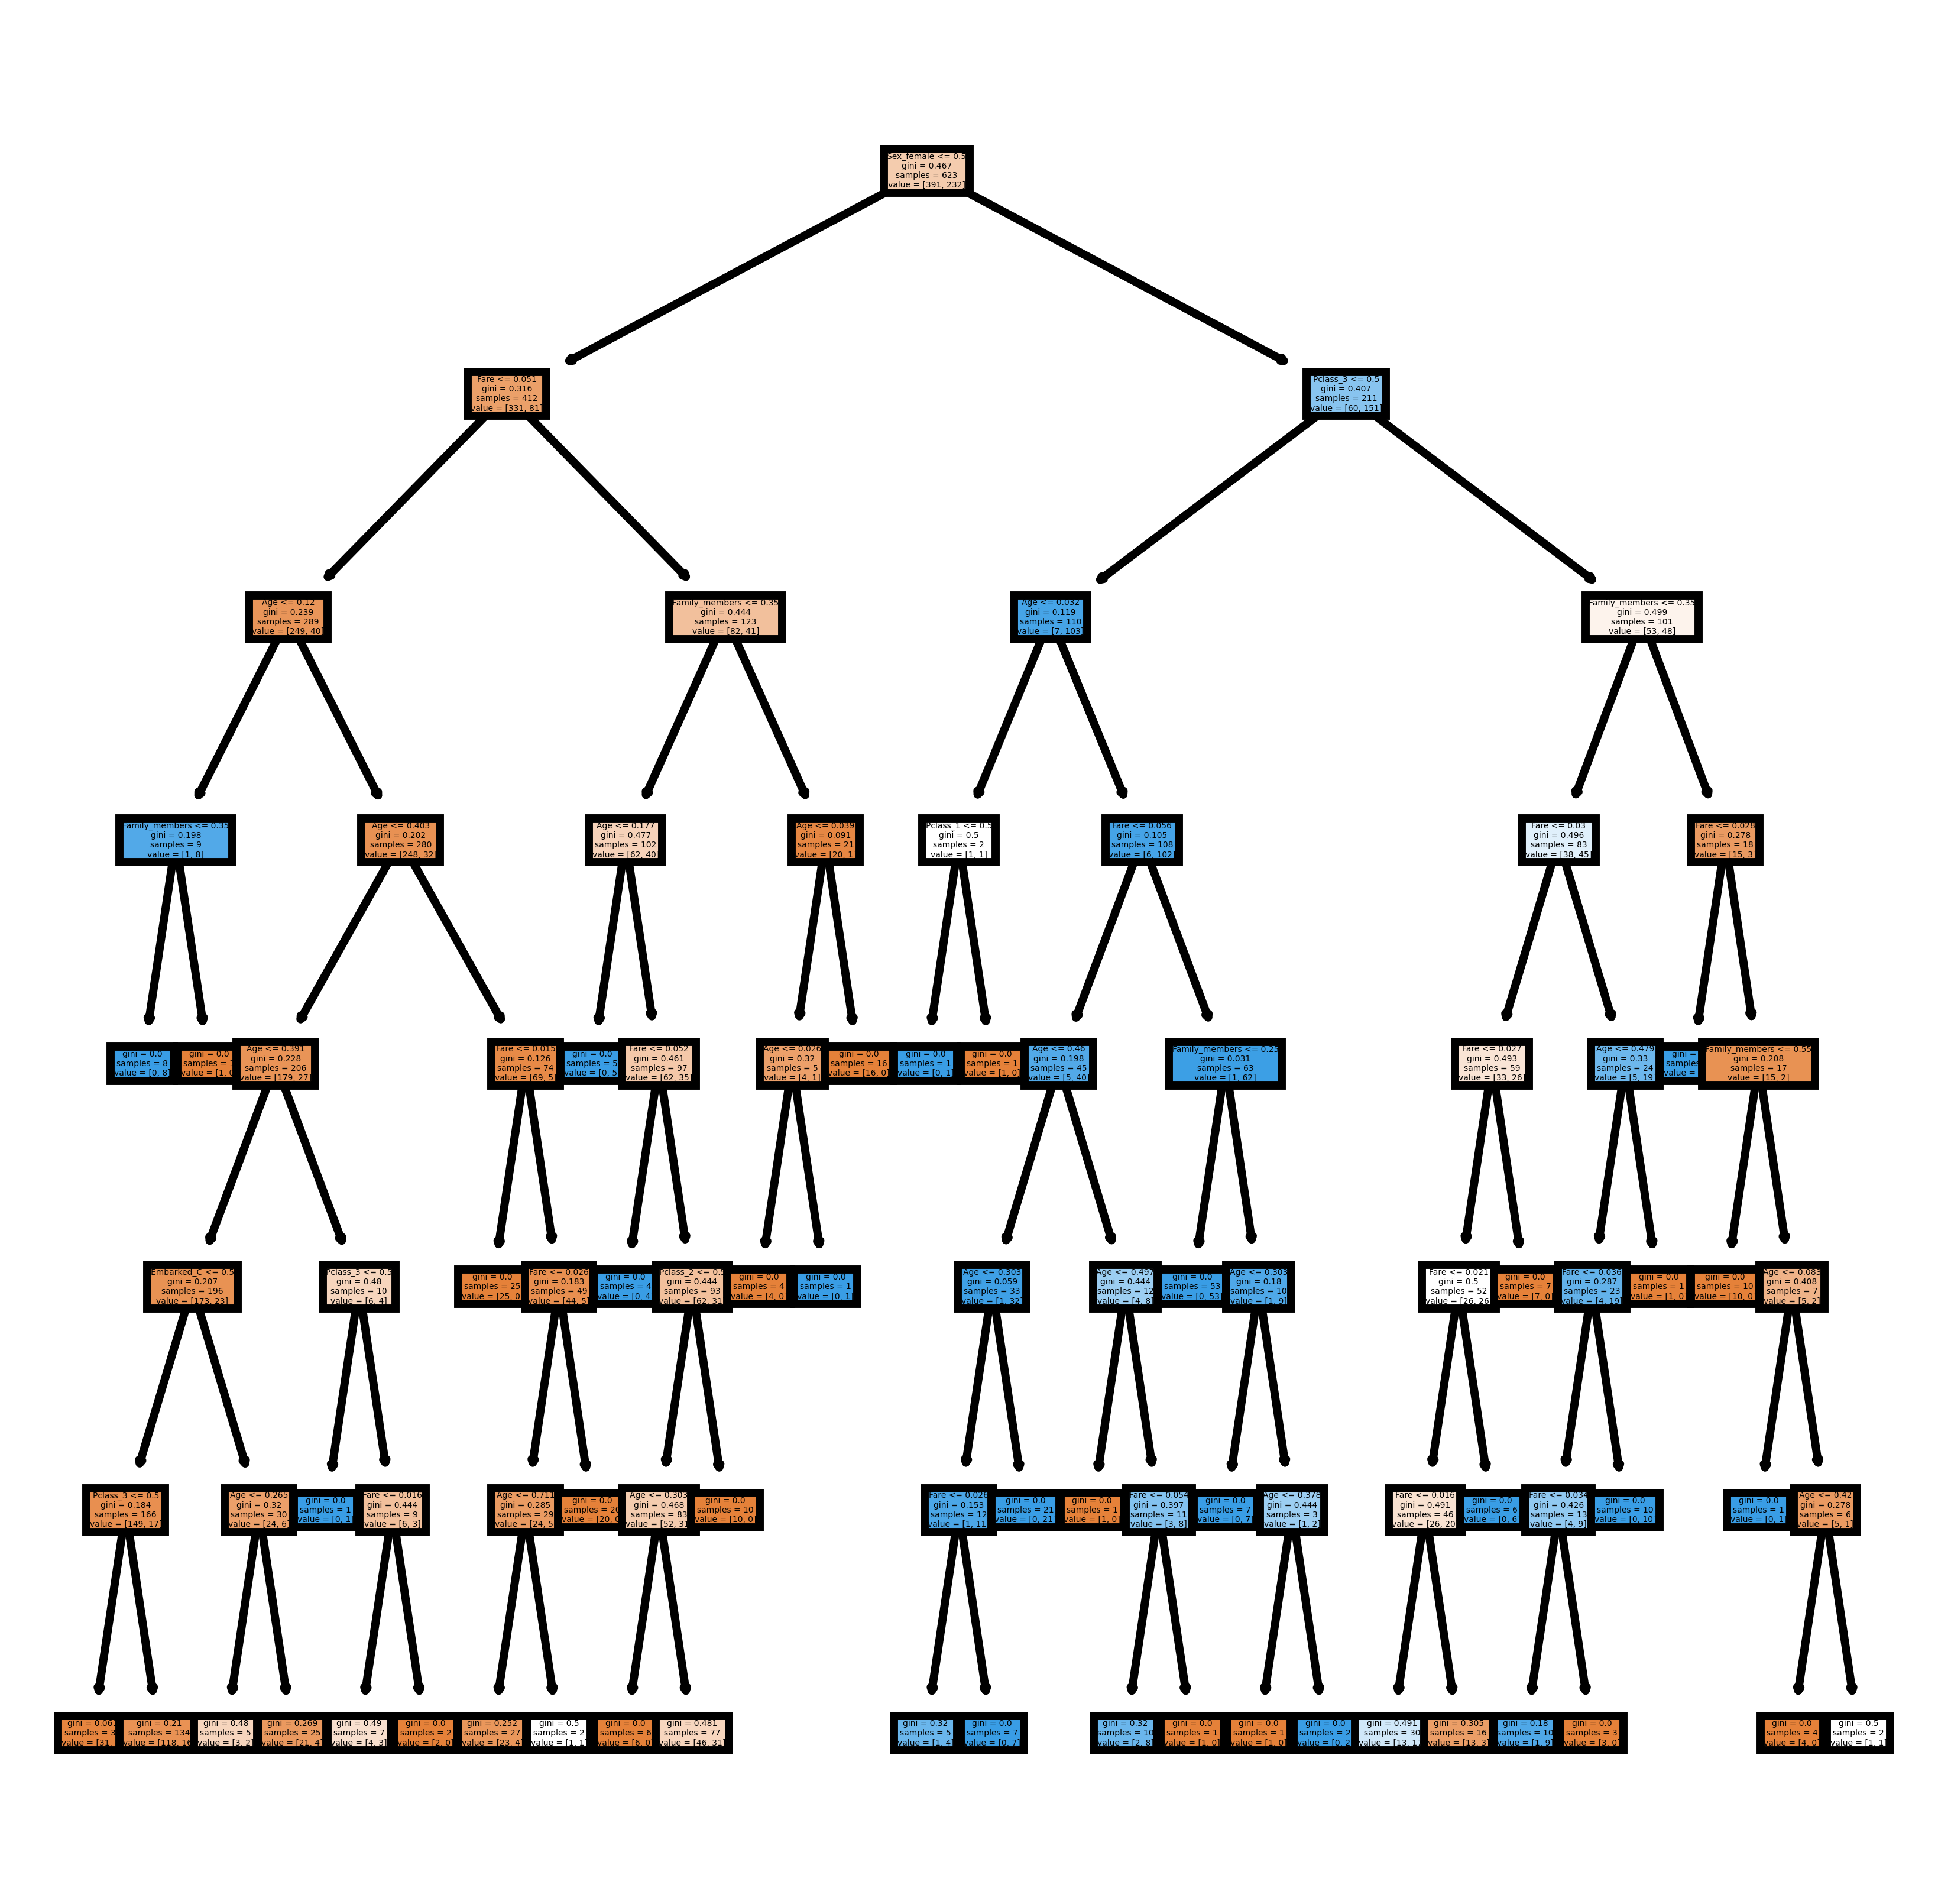

In [ ]:
from sklearn import tree
from sklearn.tree import plot_tree
feature_names= X.columns
plt.figure(figsize=(4,4),dpi=1000)
plot_tree(best_max_depth_tree,feature_names=feature_names,filled=True)
plt.show 



Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

In [ ]:
from sklearn.ensemble import RandomForestClassifier
n_estimators=[int(x) for x in np.linspace(start=10,stop=80 ,num=10)]
max_features=['auto','sqrt']
max_depth =[2,4]
min_samples_split =[2,5]
min_samples_leaf =[1,2]
bootstrap =[True,False]
#write code here

In [ ]:
param_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
  'max_depth':max_depth,
  'min_samples_split':min_samples_split,
  'min_samples_leaf':min_samples_leaf,
  'bootstrap':bootstrap
}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
rf_Model=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid=GridSearchCV(estimator=rf_Model,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

In [ ]:
rf_Grid.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 25}

In [ ]:
print(f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print(f'test  Accuracy - :{rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.833
test  Accuracy - :0.854


### 2. Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
grid =dict()
grid["n_estimators"]=[10,50,100,500]
grid['learning_rate']=[0.0001,0.001,0.01,0.1,1.0]
grid['algorithm']=['SAMME','SAMME.R']
grid_search=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=-1,cv=10,scoring='accuracy')
grid_result=grid_search.fit(X,y)
print("Best: %f using %s " % (grid_result.best_score_,grid_result.best_params_))
#write code here

Best: 0.813745 using {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 50} 


### 3. Pruning Techniques

In [ ]:
ccp_alphas = dt_model.cost_complexity_pruning_path(X_train, y_train) ["ccp_alphas"]
ccp_alpha_grid_search = GridSearchCV( estimator=DecisionTreeClassifier(random_state=10), scoring=make_scorer(accuracy_score), param_grid=ParameterGrid({"ccp_alpha": [[alpha] for alpha in ccp_alphas]}),

)
ccp_alpha_grid_search.fit(X_train, y_train)


ccp_alpha_grid_search.best_params_

best_ccp_alpha_tree = ccp_alpha_grid_search.best_estimator_

#write code here


<function matplotlib.pyplot.show(*args, **kw)>

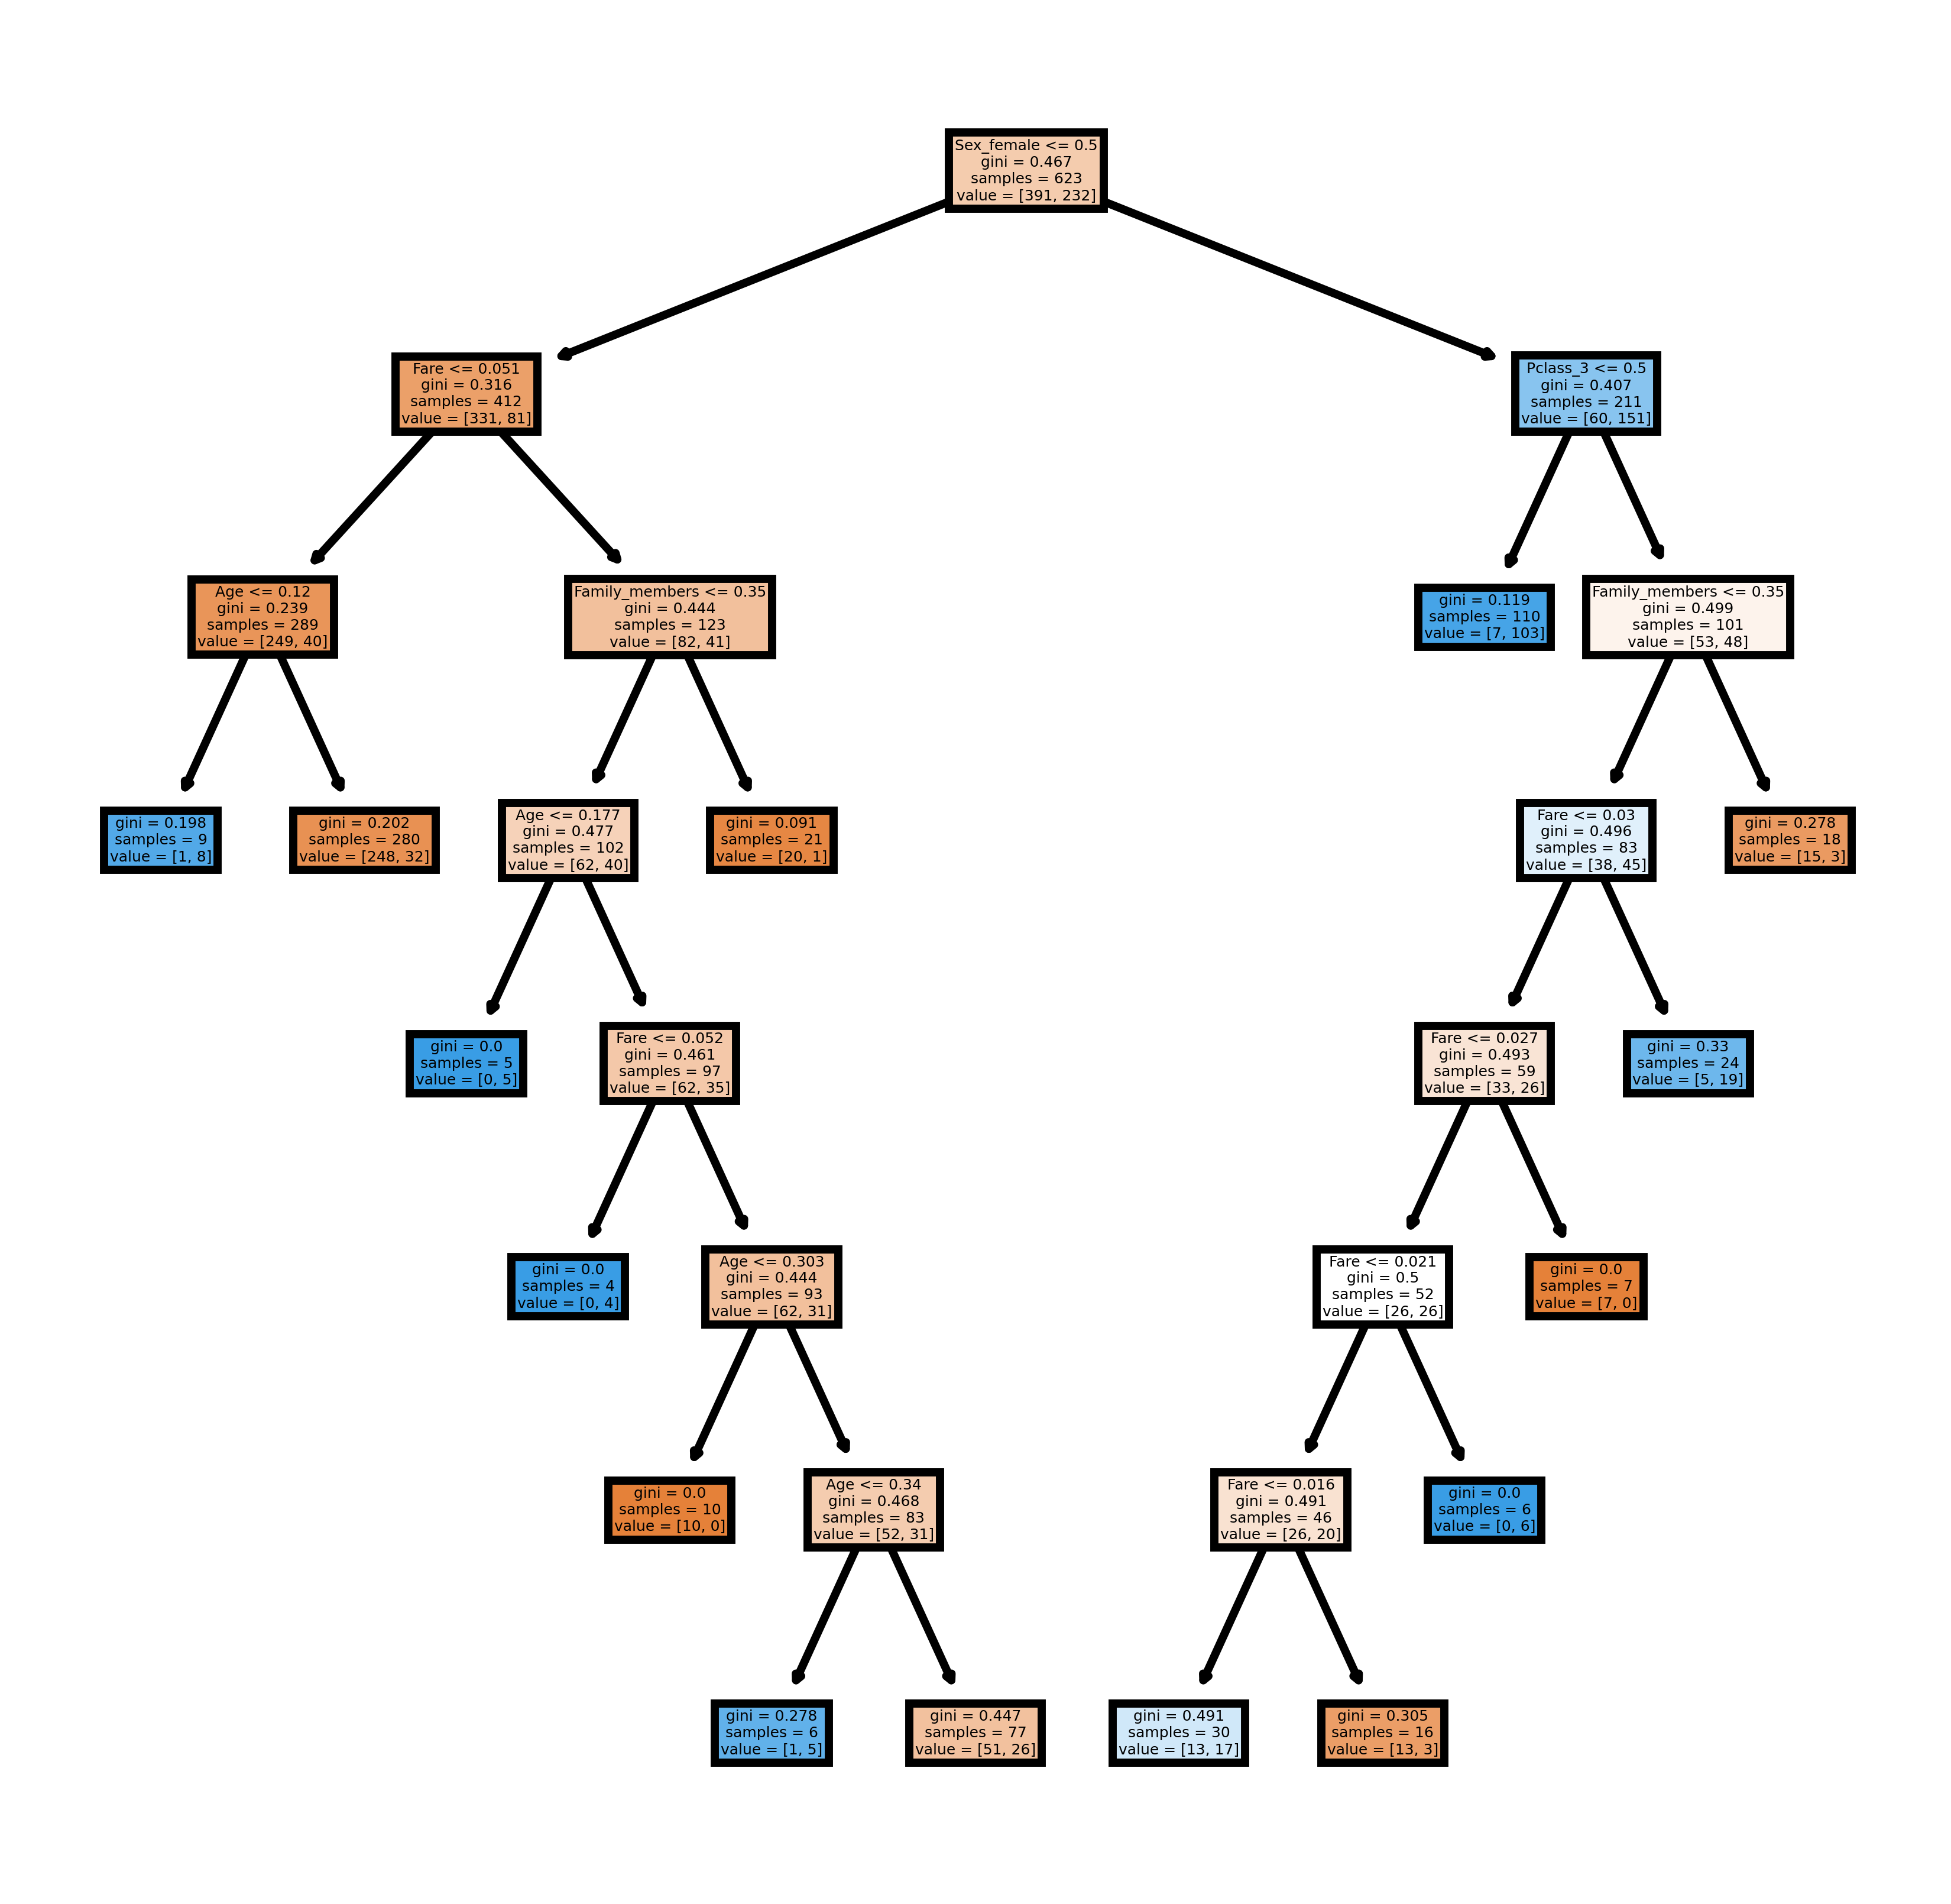

In [ ]:

plt.figure(figsize=(4,4),dpi=1000)
plot_tree(best_ccp_alpha_tree,feature_names=feature_names,filled=True)
plt.show 


In [ ]:
 print(classification_report (y_test, best_ccp_alpha_tree.predict(X_test)))


              precision    recall  f1-score   support

           0       0.87      0.94      0.90       158
           1       0.91      0.79      0.84       110

    accuracy                           0.88       268
   macro avg       0.89      0.87      0.87       268
weighted avg       0.88      0.88      0.88       268



## Optimal model

After studying these techniques, analyse which method gives you the best accuracy and choose it as your final model.


the model after using pruning techniques gives the best accuracy . 
hence that can be chosen as a fnalmodel with an accuracy of 0.88.

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **Naive Bayes Algortihm**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2022 - 2023